<a href="https://colab.research.google.com/github/juliana-zh/machine_learning/blob/main/House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "Цены на дома"

**Цель**: по заданным признакам предсказать цены на дома.

Проект на платформе Kaggle: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

**План**:
1. Понимание задачи. Посмотреть на признаки, понять, что они означают и сделать первоначальное предположение о важности для решения этой задачи
2. Одномерный анализ. Мы сфокусируемся на зависимом признаке ('SalePrice') и попробуем узнать немного больше о нем.
3. Многомерный анализ. Мы попытаемся понять, как зависимые и независимые признаки связаны друг с другом.
4. Убрать лишнее. Обработка пропусков, выбросов и категориальных признаков.
5. Проверка предположений

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/juliana-zh/machine_learning/main/datasets/house_prices/train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1. Понимание задачи

Лучше будет посмотреть на признаки нашего датасета, понять, что они означают и попробовать сначала прикинуть, какие из признаков оказывают большее влияние на проблему.

Например, можно было бы расписать для каждого из признаков такую информацию:
- имя признака
- тип признака (численный или категориальный)
- к какой группе по смыслу относится: например: 1)площадь 2) качество 3) локация
- ожидания: какое влияние этот нецелевой признак оказывает на целевой признак (можно использовать категории: низкое, среднее, высокое)
- вывод: какое влияние этот нецелевой признак оказывает на целевой признак исходя из наших наблюдений за данными
- комментрии

Колонка "Ожидания" важна, и можно было бы попытаться развить навык оценки путем использования следующих вопросов:
- думаем ли мы об этом признаке, когда собираемся приобрести дом?
- какая степень влияния этого признака на наше решение?
- включена ли информация об этом признаке в какой-то другой признак. Пример: число машин в гараже и общая площадь гаража, площадь фундамента и площадь первого этажа

После того, как мы продумали все это, берем признаки с высоким ожиданием и строим scatter-график зависимости этих признаков и целевого (здесь 'SalePrice'). Далее мы можем по итогам сделать поправки относительно наших ожиданий в пункте "вывод".





Все переменные указаны тут: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Предположим, мы изучили данные и наделили некоторые из признаков высоким ожиданием относительно влияния на целевой признак. Пусть в данном случае мы выделили:

- OverallQual - общее качество строения
- YearBuilt - год постройки
- TotalBsmtSF - общая площадь фундамента
- GrLivArea - общая жилищная площадь (над фундаментом)

Насчет групп признаков: два из них относятся к группе характеристик здания (OverallQual и YearBuilt), два из них - к группе пространства (TotalBsmtSF, GrLivArea)

Отметим, что box plots более удобны для визуализации категориальных признаков

## Одномерный анализ

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

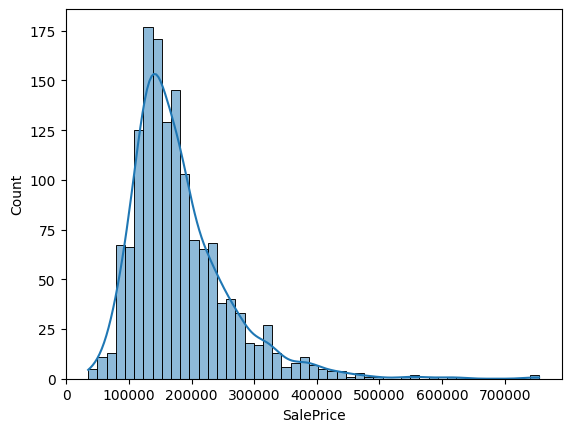

In [7]:
sns.histplot(df_train['SalePrice'], kde=True);

Что мы видим?
- график отклонен от нормального распределения
- положительная ассиметрия (positive skewness) - когда хвост распределения справа длиннее, чем слева
- видимый пик

In [8]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Kurtosis - величина, показывающая то, насколько график имеет длинный хвост. Это зависит от того, насколько много у нас выбросов.